# Assignment 1 specification

The purpose of this assignment is to use EDA on two of the datasets met in class.

## Which datasets to consider?

In [1]:
import random

# Students should replace 12345678 with their student id (8-digit number, starting with 200)
myStudentId = 20088634

# Use myStudentId as the seed for the random number generator
random.seed(myStudentId)

dataSetToIgnore = random.choice(['Tips', 'Titanic', 'Algae'])
dataSetToIgnore

'Titanic'

Students should consider 2 sets from 'Tips', 'Titanic', 'Algae', ignoring the set that was randomly selected above.

 **Please run the cell below before running any other cells**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

##Start of EDA 1##

# Introduction:

It is important for any restaurant owner to know the breakdown of some of his customers data.

Being able to visualize and compare this data will help the owner identify what are the weaknesses and points of strength in the services that he/she offers to his/her customers and it helps the restaurent to improve the services and therefore achieve bigger gains.

For the tips dataset, I will be be analyzing the data that the dataset offers and try and find any relations between different columns which can help a restaurent owner to determine what aproaches can be taken to improve the restaurent services.

I will also try to see what relations are important to display in the analysis from my prespective as well

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

The first thing I did was loading the data

In [2]:
tips = pd.read_csv('tips.csv')
df = pd.DataFrame(tips)
print(df.shape)
df.head(10) 

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


I then added a new column called Tip_percentage, it is important because it calculates the difference between the tip column and the total_bill in percentage

In [3]:
df['Tip_percentage'] = df.total_bill / df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,16.821782
1,10.34,1.66,Male,No,Sun,Dinner,3,6.228916
2,21.01,3.50,Male,No,Sun,Dinner,3,6.002857
3,23.68,3.31,Male,No,Sun,Dinner,2,7.154079
4,24.59,3.61,Female,No,Sun,Dinner,4,6.811634


I then changed the sex column type to categorical

In [4]:
df.sex = pd.Categorical(df.sex)
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

I then changed the day column type to categorical

In [5]:
df.day = pd.Categorical(df.day, categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']

I then changed the smoker column type to categorical

In [6]:
df.smoker = pd.Categorical(df.smoker)
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

I then changed the time column type to categorical

In [7]:
df.time = pd.Categorical(df.time, categories=['Lunch', 'Dinner'], ordered=True)
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch' < 'Dinner']

In [8]:
#df.info()
df.head(15)

,total_bill,tip,sex,smoker,day,time,size,Tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,16.821782
1,10.34,1.66,Male,No,Sun,Dinner,3,6.228916
2,21.01,3.50,Male,No,Sun,Dinner,3,6.002857
3,23.68,3.31,Male,No,Sun,Dinner,2,7.154079
4,24.59,3.61,Female,No,Sun,Dinner,4,6.811634
5,25.29,4.71,Male,No,Sun,Dinner,4,5.369427
6,8.77,2.00,Male,No,Sun,Dinner,2,4.385000
7,26.88,3.12,Male,No,Sun,Dinner,4,8.615385
8,15.04,1.96,Male,No,Sun,Dinner,2,7.673469
9,14.78,3.23,Male,No,Sun,Dinner,2,4.575851


As we can see in the dataset, if we look at the time column, we will find that all the row values of it are actually names of meals.
For that, I decided to change the name of the column to meal, I also decided to capitallize all the names of the columns to highlight their importance

In [9]:
df.rename(
    columns={ 
        'time': 'Meal',
        'total_bill': 'Total_bill',
        'tip': 'Tip',
        'sex': 'Sex',
        'smoker': 'Smoker',
        'day':'Day',
        'size':'Size'
    },
    inplace=True
)
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Meal,Size,Tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,16.821782
1,10.34,1.66,Male,No,Sun,Dinner,3,6.228916
2,21.01,3.50,Male,No,Sun,Dinner,3,6.002857
3,23.68,3.31,Male,No,Sun,Dinner,2,7.154079
4,24.59,3.61,Female,No,Sun,Dinner,4,6.811634


I then decided to set the index to be the day, this will help me to sort the rows by time (Day)

In [10]:
df.set_index('Day', inplace=True) # Sets the index as the day column
df.tail()

,Total_bill,Tip,Sex,Smoker,Meal,Size,Tip_percentage
Day,,,,,,,
Sat,29.03,5.92,Male,No,Dinner,3,4.903716
Sat,27.18,2.00,Female,Yes,Dinner,2,13.590000
Sat,22.67,2.00,Male,Yes,Dinner,2,11.335000
Sat,17.82,1.75,Male,No,Dinner,2,10.182857
Thur,18.78,3.00,Female,No,Dinner,2,6.260000


After that I sorted the rows by the new index (day), this will help me later to see if there is a relation between the day and other columns

In [11]:
df.sort_index(inplace=True) # Sorts by index (in this case the day column)
df.tail(15)

,Total_bill,Tip,Sex,Smoker,Meal,Size,Tip_percentage
Day,,,,,,,
Sun,7.25,5.15,Male,Yes,Dinner,2,1.407767
Sun,31.71,4.50,Male,No,Dinner,4,7.046667
Sun,20.76,2.24,Male,No,Dinner,2,9.267857
Sun,24.52,3.48,Male,No,Dinner,3,7.045977
Sun,17.51,3.00,Female,Yes,Dinner,2,5.836667
Sun,13.81,2.00,Male,No,Dinner,2,6.905000
Sun,16.21,2.00,Female,No,Dinner,3,8.105000
Sun,12.66,2.50,Male,No,Dinner,2,5.064000
Sun,21.50,3.50,Male,No,Dinner,4,6.142857


I then decided to change the values in the Sex column from 'Female', 'Male' to 'F', 'M' because it is easy to differentiate between the two categorical values with their initials only which will make things less simple

In [12]:
# https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
df['Sex'] = df['Sex'].map({'Female': 'F', 'Male': 'M'})
df.head()

,Total_bill,Tip,Sex,Smoker,Meal,Size,Tip_percentage
Day,,,,,,,
Thur,13.42,1.68,F,No,Lunch,2,7.988095
Thur,12.26,2.00,F,No,Lunch,2,6.130000
Thur,11.17,1.50,F,No,Lunch,2,7.446667
Thur,20.27,2.83,F,No,Lunch,2,7.162544
Thur,19.08,1.50,M,No,Lunch,2,12.720000


I then checked if there are any missing values in the dataset and found non

In [13]:
df.isnull().values.any()

False

I then resetted the index so I can use the Day column as a feature later and be able to create histograms with sns. The columns will remain sorted by Day even though I resetted the index which is a good thing

In [14]:
df.reset_index(inplace=True)
df.head()

,Day,Total_bill,Tip,Sex,Smoker,Meal,Size,Tip_percentage
0,Thur,13.42,1.68,F,No,Lunch,2,7.988095
1,Thur,12.26,2.00,F,No,Lunch,2,6.130000
2,Thur,11.17,1.50,F,No,Lunch,2,7.446667
3,Thur,20.27,2.83,F,No,Lunch,2,7.162544
4,Thur,19.08,1.50,M,No,Lunch,2,12.720000


I also rounded up all float values of Tip_percentage to make all the numerical data columns values look the same to avoid any confusion

In [15]:
df.Tip_percentage = df.Tip_percentage.astype(float).round(2)
df.head()

,Day,Total_bill,Tip,Sex,Smoker,Meal,Size,Tip_percentage
0,Thur,13.42,1.68,F,No,Lunch,2,7.99
1,Thur,12.26,2.00,F,No,Lunch,2,6.13
2,Thur,11.17,1.50,F,No,Lunch,2,7.45
3,Thur,20.27,2.83,F,No,Lunch,2,7.16
4,Thur,19.08,1.50,M,No,Lunch,2,12.72


##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

I wanted to see how many Males and Females the dataset have in total, so I generated the graph below.

<AxesSubplot:xlabel='Sex', ylabel='count'>

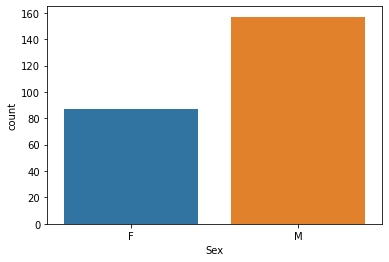

In [16]:
sns.countplot(x="Sex", data=df)

As seen above, the count of males is a lot bigger than the count of females

This gave an insite of how data looks like, it also gave an initial and possible explanation of any data visualization encounters were Males achieve higher numbers than Females or vise versa, for example in spending tips or total bills

I then decided to check the number of smokers in the dataset

<AxesSubplot:xlabel='Smoker', ylabel='count'>

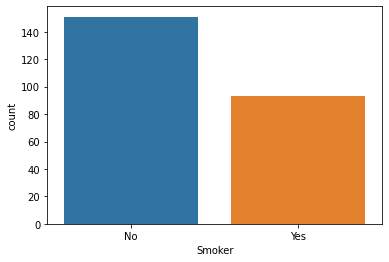

In [17]:
sns.countplot(x="Smoker", data=df)

As seen above, the count of non smokers is a lot bigger than the count of smokers

This gave an insite of how data looks like, it also gave an initial and possible explanation of any data visualization encounters were Non Smokers achieve higher numbers than Non Smokers or vise versa, for example in spending tips or total bills

I then decided to check the count of the available sizes

<AxesSubplot:xlabel='Size', ylabel='count'>

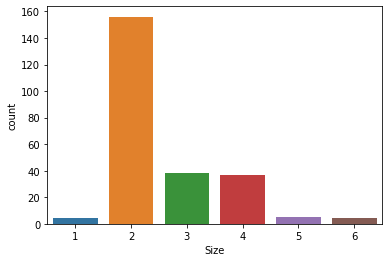

In [18]:
sns.countplot(x="Size", data=df)

As seen above size 2 is the most picked size and sizes 1,5 and 6 are the least spoken

This gave an insite of how data looks like, it also gave an initial and possible explanation of any data visualization encounters were a certain size achieve higher numbers than another size or vise versa, for example in spending tips or total bills

I then decided to check the count of meals in the dataset

<AxesSubplot:xlabel='Meal', ylabel='count'>

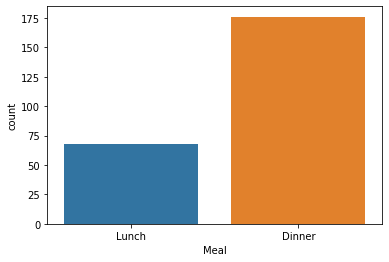

In [19]:
sns.countplot(x="Meal", data=df)

As seen above, the count of dinner meals is a lot bigger than the count of lunch meals

This gave an insite of how data looks like, it also gave an initial and possible explanation of any data visualization encounters were Dinner achieve higher numbers than Lunch or vise versa, for example in spending tips or total bills

I then decided to check the count of days in dataset

<AxesSubplot:xlabel='Day', ylabel='count'>

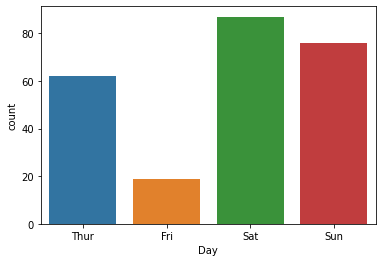

In [20]:
sns.countplot(x="Day", data=df)

As seen above, the number of people who come on Saturday is the highest and the number of people who come on Friday is the lowest

This gave an insite of how data looks like, it also gave an initial and possible explanation of any data visualization encounters were a certain day achieve higher numbers than another day or vise versa, for example in spending tips or total bills

I then decided to check the min and max total_bill, tip and size

In [25]:
df.describe()

,Total_bill,Tip,Size,Tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,7.049098
std,8.902412,1.383638,0.951100,2.905285
min,3.070000,1.000000,1.000000,1.410000
25%,13.347500,2.000000,2.000000,5.222500
50%,17.795000,2.900000,2.000000,6.460000
75%,24.127500,3.562500,3.000000,7.747500
max,50.810000,10.000000,6.000000,28.060000


As seen above, min total bill is 3.07 and max total bill is 50.81, the min tip is 1 and the max tip is 10, the min size is 1 and the max size is 6

I then decided to check the count of Female and Male smokers and non smokers

<AxesSubplot:xlabel='Smoker', ylabel='Count'>

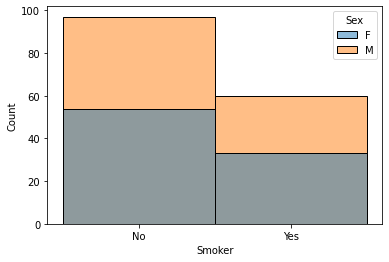

In [26]:
sns.histplot(data=df, x="Smoker", hue="Sex")
# The grey colour means that it contains both F and M, Blue means only F, Beige means only M

As seen above, the number of Males who smoke is bigger than the number of Females who smoke
and the number of Males who don't smoke is bigger than the number of Females who don't smoke

This can be due to the fact that the overall number of Males is bigger than the overall number of Females

I then decided to compare the numbers of males and females who go on lunch and dinner

<AxesSubplot:xlabel='Sex', ylabel='Count'>

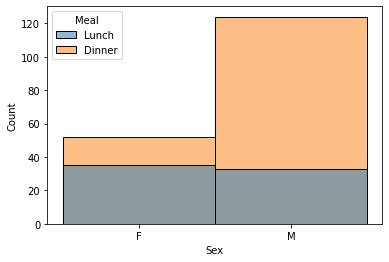

In [27]:
sns.histplot(data=df, x='Sex', hue="Meal")
#df.head()

As seen above the number of males and females who go to lunch is close to equal with slight higher difference for females
However, a lot more males go to dinner than females

In fact the number of Males who go to dinner looks greater than the number of Females who go for lunch and dinner combined

I then decided to check which meals do smokers and non smokers eat

<AxesSubplot:xlabel='Smoker', ylabel='Count'>

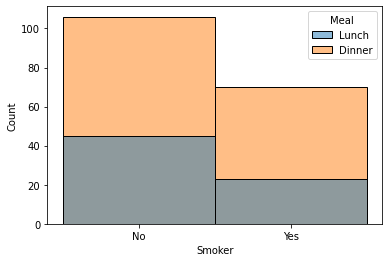

In [28]:
sns.histplot(data=df, x='Smoker', hue="Meal")

As seen above, non smokers come for lunch and dinner more than smokers.
Also both smokers and non smokers come for dinner more than comming for lunch

I then decided to check what table sizes do each gender pick

<AxesSubplot:xlabel='Size', ylabel='Count'>

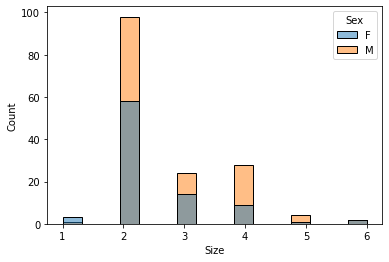

In [29]:
sns.histplot(data=df, x='Size', hue="Sex")

As seen above, more females pick tables of size 1, more males pick size 2, 3, 4 and 5 and both males and females choose size 6 equally

I then decided to check what table sizes do smokers and non smokers pick

<AxesSubplot:xlabel='Size', ylabel='Count'>

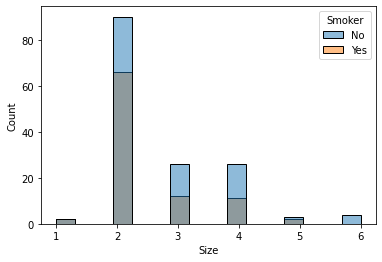

In [30]:
sns.histplot(data=df, x='Size', hue="Smoker")

As seen above smokers and non smokers equally choose size 1, more non smokers choose sizes 2,3,4 and 5, and only non smokers choose size 6

I then decided to check what table sizes get chosen for lunch and dinner

<AxesSubplot:xlabel='Size', ylabel='Count'>

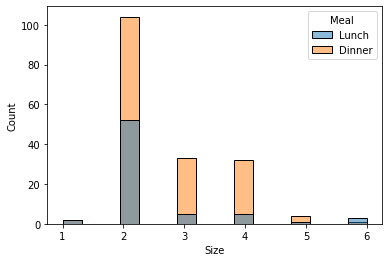

In [31]:
sns.histplot(data=df, x='Size', hue="Meal")

As seen above size one is picked equally for lunch and dinner, sizes 2,3,4 and 5 are picked more for dinner than lunch and size 6 is picked more for lunch than dinner

I then decided to check  what meals get served every day and with what quantities

<AxesSubplot:xlabel='Day', ylabel='count'>

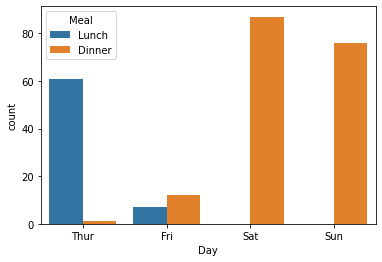

In [34]:
sns.countplot(data=df, x='Day', hue="Meal")

I found out that lunch is only served on Thursdays and Fridays while dinner gets served every day

I also found out that lunch gets served on Thursday more than Friday

I also found out that dinner is served the most on Saturday and least on Thursday

Dinner is served more than lunch everyday except for Thursday

I then decided to check what sizes get picked every day and what are their quantities

<AxesSubplot:xlabel='Day', ylabel='count'>

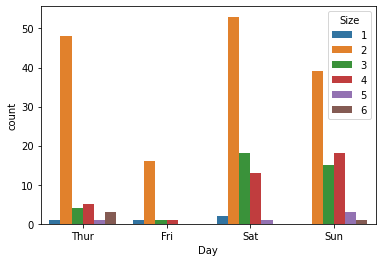

In [35]:
sns.countplot(data=df, x='Day', hue="Size")

I found out that all sizes get picked on Thursday, sizes 1,2,3,4 are picked on Friday, sizes 1,2,3,4,5 are picked on Saturday and sizes 2,3,4,5,6 are picked on Sunday

We can also see from above that the most picked size is 2 and it gets picked the most on Saturday and the least on Friday

Size 6 gets picked only on Thursday and Sunday and it is the only size that gets picked in 2 days only

I then decided to check what days of the week do smokers and non smokers come for

<AxesSubplot:xlabel='Day', ylabel='Count'>

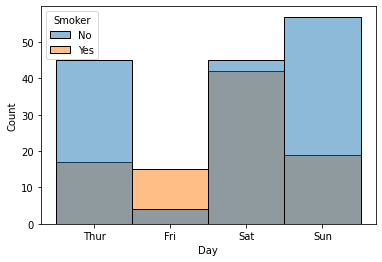

In [36]:
sns.histplot(data=df, x='Day', hue="Smoker")

I found out that more non smokers come on Thursday, Saturday and Sunday, while more smokers come on Friday

I then decided to check what days of the week do males and females come for

<AxesSubplot:xlabel='Day', ylabel='Count'>

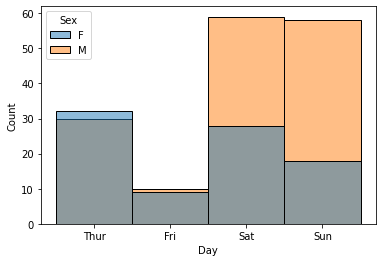

In [37]:
sns.histplot(data=df, x='Day', hue="Sex")

As seen above, more females come on Thursday while more males come on Friday, Saturday and Sunday with a very small difference on Friday

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

I then decided to check who give bigger tips, males or females

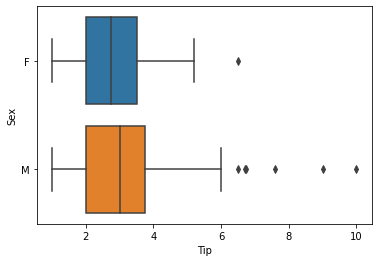

In [38]:
#sns.displot(df, x="Sex", hue="Smoker", stat="Tip")
#https://pythonbasics.org/seaborn-boxplot/
sns.boxplot( y=df["Sex"], x=df["Tip"] );

As seen above, males give max tip (10) which is bigger than the max tip of females

I then decided to check who gives bigger tips, smokers or non smokers

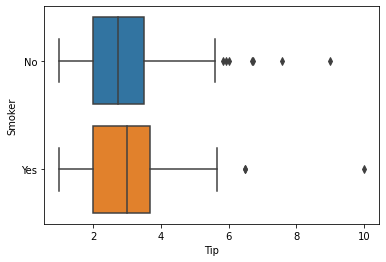

In [39]:
sns.boxplot( y=df["Smoker"], x=df["Tip"]);

As seen above, smokers gave max tip (10) which is bigger than the max tip of non smokers

I then decided to check who spends a greater total bill, males or females

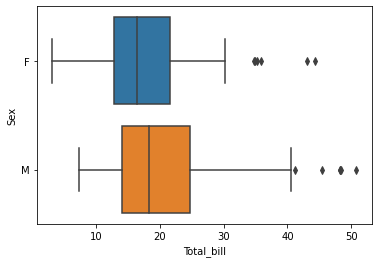

In [40]:
sns.boxplot( y=df["Sex"], x=df["Total_bill"]);

As seen above, males max total bill is over 50 which is bigger than the female max total bill

I then decided to check who spends a greater total bill, smokers or non smokers

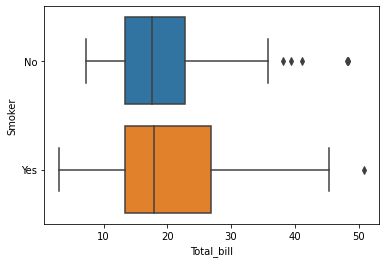

In [41]:
sns.boxplot( y=df["Smoker"], x=df["Total_bill"]);

As seen above, smokers spend a greater max total bill compared to non smokers

The middle quartile looks almost equal for smokers and non smokers

I then decided to check when are the total bills greater, during lunch or dinner

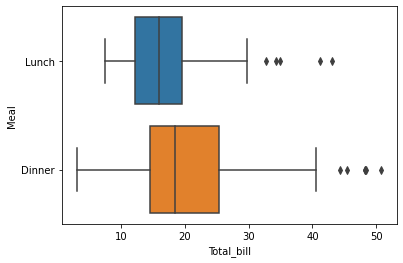

In [42]:
sns.boxplot( y=df["Meal"], x=df["Total_bill"]);

As seen above, people spend more money for the total bill when they go on dinner rather than lunch (max total bill for lunch bigger than maxtotal bill for dinner)

I then decided to check when are the tips greater, during lunch or dinner

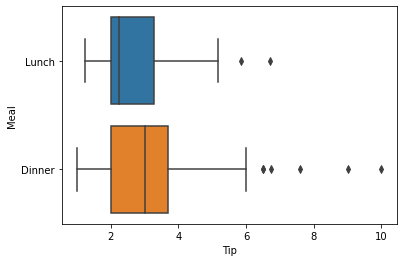

In [29]:
sns.boxplot( y=df["Meal"], x=df["Tip"]);

As seen above, people spend more money on tips during dinner rather than lunch, (the max tip for dinner is greater than the max tip for lunch)

There is also a big difference between the middle quartile of lunch and dinner with dinner having a greater middle quartile

I then decided to check and see who gives greater tips, smokers or non smokers. I also used sex as a hue

<AxesSubplot:xlabel='Tip', ylabel='Smoker'>

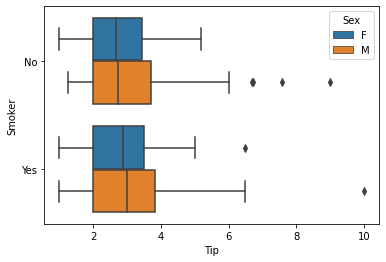

In [43]:
sns.boxplot(data=df, y="Smoker", x= "Tip" , hue="Sex")

As seen above, male smokers give the biggest max tip while female non somkers give the smallest max tip

We can also see that the middle quartile is almost equal for all four boxes

I then decided to check and see who pays a bigger total bill, smokers or non smokers. I also used sex as a hue

<AxesSubplot:xlabel='Total_bill', ylabel='Smoker'>

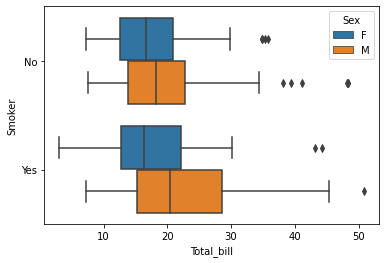

In [44]:
sns.boxplot(data=df, y="Smoker", x= "Total_bill" , hue="Sex")

As seen above, smoking males pay the biggest max total bill while non smoking females pay the smallest max total bill

Also smoking females pay the smallest minimum total bill

I then decided to check who pays the biggest total bills based on the day, males or females

<AxesSubplot:xlabel='Total_bill', ylabel='Day'>

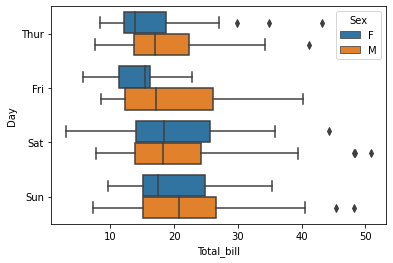

In [45]:
sns.boxplot(data=df, y="Day", x= "Total_bill" , hue="Sex")

As seen above, males pay the biggest total bill on Saturday and they pay the smallest total bill on Thursday (smallest total bill means smallest minimum of total bill)

Females pay the biggest total bill on Saturday and the smallest total bill on Saturday as well

Males Pay more than females on all days except for Thursday

I then decided to check who pays the biggest tip based on the day, males or females

<AxesSubplot:xlabel='Tip', ylabel='Day'>

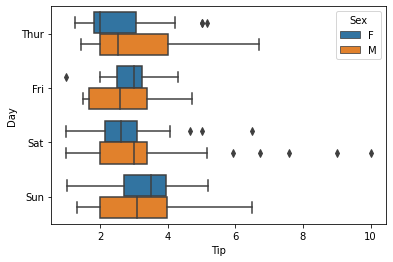

In [46]:
sns.boxplot(data=df, y="Day", x= "Tip" , hue="Sex")

As seen above, males pay the biggest tip on Saturday and the smallest tip on Saturday too

Females pay the biggest tip on Sunday and the smallest tip on Friday, Saturday and Sunday

Males Pay more than females in all days

I then decided to see where do the biggest tips get payed, in lunch or dinner, I used the Sex column as a hue

<AxesSubplot:xlabel='Tip', ylabel='Meal'>

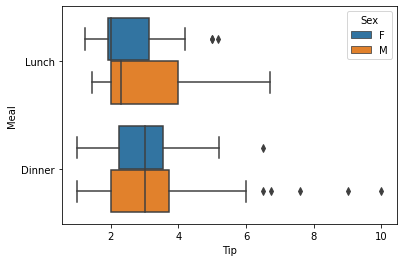

In [47]:
sns.boxplot(data=df, y="Meal", x= "Tip" , hue="Sex")

I then found out that the biggest tip get payed at dinner by males

Females pay biggest tip in dinner too

Also the middle quartile for females and males at dinner is almost the exact same

I then decided to see where do the biggest total bills get payed, in lunch or dinner, I used the Sex column as a hue

<AxesSubplot:xlabel='Total_bill', ylabel='Meal'>

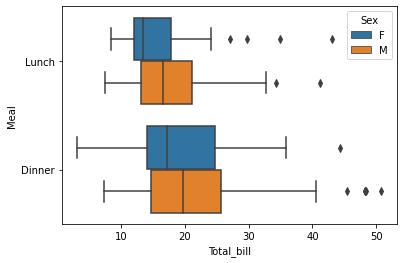

In [48]:
sns.boxplot(data=df, y="Meal", x= "Total_bill" , hue="Sex")

As we can see above, males pay the biggest total bill at dinner and the smallest total bills at dinner too. Females are the same

I then decided to check who have the bigger tip percentage, males or females

<AxesSubplot:xlabel='Tip_percentage', ylabel='Sex'>

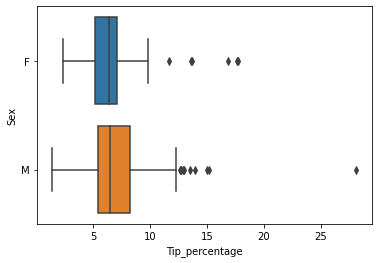

In [28]:
sns.boxplot(data=df, y="Sex", x= "Tip_percentage")

As seen above, I found out that males have the biggest max tip percentage than females with a slightly higher middle quartile too

I then decided to check the relation between tips and total_bills

<AxesSubplot:xlabel='Total_bill', ylabel='Tip'>

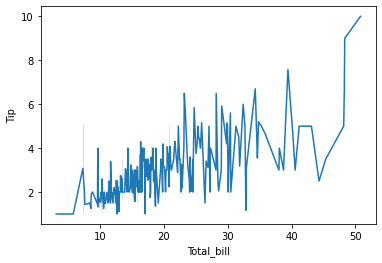

In [49]:
sns.lineplot(data=df, x="Total_bill", y="Tip")

As seen above, when the total bill is high, the tip becomes high too

However, there are some irregular cases were the bill is high and tip is low

I then decided to check the relation between the size and the total bill

<AxesSubplot:xlabel='Size', ylabel='Total_bill'>

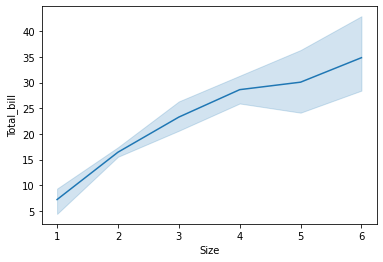

In [20]:
sns.lineplot(data=df, x="Size", y="Total_bill")

As we see above, when the size is bigger the total bill gets higher

This is logical because the sizes picked reflect the number of people which means more food to pay for and therefore higher total bills

This suggests that the linear relation between total bill and size is strong

I then decided to check the relation between the size and the tip

<AxesSubplot:xlabel='Size', ylabel='Tip'>

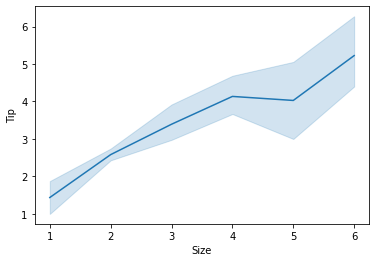

In [50]:
sns.lineplot(data=df, x="Size", y="Tip")

As seen above, when the size gets bigger the tip gets bigger too

This insures the information we got from the diagram that compares between the total bill and the tip

This is because we saw now that both total bill and tip grow higher when the size is bigger

So as the total bill grows, the tip grows with it too

This suggests that the linear relation between tip and size is strong

I then decided to create a pairplot to display some of the previous numerical data comparisons togeather

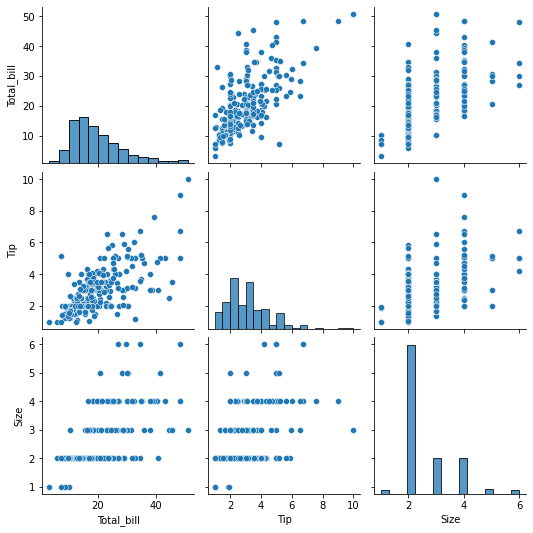

In [39]:
#df.tail()
sns.pairplot(df)

##End of Answer 3##

# Summery:

As we have seen previously, we were able to discover a lot of correlations between different columns.

For example, we found correlations between total bill and tip, total bill and size, size and tip, etc.

The questions that we have raised will help the restaurent owner to make some decisions that will increase the gains of the restaurent and limit the losses.

For example, the restaurent owner can decide to make some staff members work half day on Friday because only table sizes from 1 to 4 are taken by customers, which means weak customers presence, therefore there will be no need to employ too many staff on Friday and lose some unnecessery additional money on their income if there is no work that they can do in certain days

##End of EDA 1##

##Start of EDA 2##

# Introduction:

The growth of algae in river waters can have many disadvantages for living things under water

Alages can cause sunlight block and oxygen consumption according to https://www.epa.gov/nutrientpollution/effects-dead-zones-and-harmful-algal-blooms#:~:text=The%20overgrowth%20of%20algae%20consumes,for%20aquatic%20life%20to%20survive.

This might later have indirect disadvantages on humans in regards of the fishing industry for example

For the Analysis dataset, I will try to see the relation between some algaes and the cheical components under water and check for correlations.

This will let us to see what procedures we can make to reduce the algae growth under water and therefore preserve life under water and prevent any side effects of algae growth 

I will also try to see what relations are important to display in the analysis from my prespective as well

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

The first thing I did was reading the data from the Analysis.txt file

In [52]:
df = pd.read_table('src/Analysis.txt')
print(df.shape)
df.head()

(199, 1)


,winter small medium 8.00000 9.80000 60.80000 6.23800 578.00000 105.00000 170.00000 50.00000 0.00000 0.00000 0.00000 0.00000 34.20000 8.30000 0.00000
0,spring small medium 8.35000 ...
1,autumn small medium 8.10000 1...
2,spring small medium 8.07000 ...
3,autumn small medium 8.06000 ...
4,winter small high 8.25000 13....


When I first loaded the data the rows where treated as columns Therefore I had to use another method of loading data

In [53]:
df = pd.read_table('src/Analysis.txt', sep='\s+', header=None)
print(df.shape)
df.head()

(200, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,winter,small,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0


After using this method, rows where identified correctly as rows instead of columns which was good
However, The columns didn't have any names so I had to fix this issue

In [54]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4',
' mean_PO4', 'mean_Chlor', 'a1', ' a2', ' a3', ' a4', ' a5', ' a6', ' a7')
df = pd.read_table('src/Analysis.txt', sep='\s+', names=names)
print(df.shape)
df.head() 

(200, 18)


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0


After using this method, the columns were successfully named but another problem emerged
There were numeric columns that were converted to object
We also know from instructions.txt that missing values are indicated by XXXXXXX

In [55]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4',
' mean_PO4', 'mean_Chlor', 'a1', ' a2', ' a3', ' a4', ' a5', ' a6', ' a7')
df = pd.read_table('src/Analysis.txt', sep='\s+', names=names, na_values='XXXXXXX')
print(df.shape)
df.head(15) 

(200, 18)


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small,high,8.25,13.1,65.750,9.248,430.00000,18.250,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small,high,8.15,10.3,73.250,1.535,110.00000,61.250,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small,high,8.05,10.6,59.067,4.990,205.66701,44.667,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small,medium,8.70,3.4,21.950,0.886,102.75000,36.300,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small,high,7.93,9.9,8.000,1.390,5.80000,27.250,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


We solved the problem of object conversion of numeric columns so now need to convert categorical columns and order them too.
These are Season, Speed and Size

In [56]:
df.Season = pd.Categorical(df.Season, categories=['spring', 'summer', 'autumn', 'winter'], ordered=True)
print(df.Season.unique())

['winter', 'spring', 'autumn', 'summer']
Categories (4, object): ['spring' < 'summer' < 'autumn' < 'winter']


In the previous cell, I converted Season column to categorical and ordered it

In [57]:
df.Size = pd.Categorical(df.Size, categories=['small', 'medium', 'large'], ordered=True)
print(df.Size.unique())

['small', 'medium', 'large']
Categories (3, object): ['small' < 'medium' < 'large']


In the previous cell, I converted Size column to categorical and ordered it

In [58]:
df.Speed = pd.Categorical(df.Speed, categories=['low', 'medium', 'high'], ordered=True)
print(df.Speed.unique())
df.head(15)

['medium', 'high', 'low']
Categories (3, object): ['low' < 'medium' < 'high']


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small,high,8.25,13.1,65.750,9.248,430.00000,18.250,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small,high,8.15,10.3,73.250,1.535,110.00000,61.250,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small,high,8.05,10.6,59.067,4.990,205.66701,44.667,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small,medium,8.70,3.4,21.950,0.886,102.75000,36.300,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small,high,7.93,9.9,8.000,1.390,5.80000,27.250,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


In the previous cell, I converted Speed column to categorical and ordered it

To persist the data, I decided to save the data to pickle and csv format as seen above

In [59]:
df.to_pickle('Analysis.pkl')

In [60]:
df.to_csv('Analysis.csv', index=False)

In [61]:
df = pd.read_pickle('Analysis.pkl')
print(df.shape)
df.head(15)

(200, 18)


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small,high,8.25,13.1,65.750,9.248,430.00000,18.250,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small,high,8.15,10.3,73.250,1.535,110.00000,61.250,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small,high,8.05,10.6,59.067,4.990,205.66701,44.667,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small,medium,8.70,3.4,21.950,0.886,102.75000,36.300,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small,high,7.93,9.9,8.000,1.390,5.80000,27.250,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


I also decided to add a new column which will contain the mean of the algaes a3, a4, a5, a7 this is because the rest of the algaes numeric values have different ranges from those algaes (their ranges are close to 70 and 80) I will be showing this later with boxplots

In [62]:
df.columns = (df.columns.str.strip()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

# make it a3, a4, a5, a7 (based on range)
temp = ['a3', 'a4', 'a5', 'a7']
df['algae_mean'] = df[temp].sum(axis=1) / 4

#df.info()
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11640\3377853461.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns.str.strip()
C:\Users\USER\AppData\Local\Temp\ipykernel_11640\3377853461.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns.str.strip()


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7,algae_mean
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0,8.550
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1,3.875
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7,2.900
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4,5.425
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0,4.000


-----------------------

After doing that I decided to do more cleaning

First I changed the index to Season so I can sort by Season

In [63]:
df.set_index('Season', inplace=True)
df.head()

,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7,algae_mean
Season,,,,,,,,,,,,,,,,,,
winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0,8.550
spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1,3.875
autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7,2.900
spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4,5.425
autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0,4.000


Then I sorted the rows by the new index (Season)

In [64]:
df.sort_index(inplace=True)
#df.reset_index(inplace=True)
df.tail(15)

,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7,algae_mean
Season,,,,,,,,,,,,,,,,,,
winter,medium,medium,7.90,11.2,49.900,9.773,505.00000,67.50000,143.75000,5.450,2.1,2.6,0.0,0.0,15.0,15.7,0.0,3.750
winter,small,high,8.30,10.9,1.170,0.735,13.50000,1.62500,3.00000,0.200,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
winter,medium,low,8.43,9.9,37.600,0.826,124.00000,32.50000,115.00000,11.700,9.2,2.9,2.0,1.3,2.5,0.0,0.0,1.450
winter,small,high,7.09,8.4,10.500,1.572,28.00000,4.00000,13.60000,0.500,29.7,0.0,0.0,4.9,0.0,0.0,0.0,1.225
winter,small,medium,8.30,8.9,20.625,3.414,228.75000,196.62000,253.25000,12.320,2.0,38.5,4.1,2.2,0.0,0.0,10.2,4.125
winter,medium,medium,7.90,9.8,194.750,6.513,3466.65991,23.00000,173.75000,15.300,0.0,0.0,1.0,0.0,9.0,64.6,0.0,2.500
winter,small,high,8.30,7.7,50.000,8.543,76.00000,264.89999,344.60001,22.500,0.0,40.9,7.5,0.0,2.4,1.5,0.0,2.475
winter,medium,high,8.50,10.1,10.936,1.335,236.00000,34.63600,72.90000,11.100,4.2,0.0,1.4,1.9,16.2,0.0,1.4,5.225
winter,small,high,8.40,13.4,69.750,4.555,37.50000,10.00000,40.66700,3.900,51.8,4.1,0.0,0.0,3.1,5.5,0.0,0.775


I then decided to round all floats to one decimal place, this will prevent any confusions and now all the numeric data will look the same

In [65]:
# https://stackoverflow.com/questions/38255796/pandas-round-is-not-working-for-dataframe
for i in df.columns[2:]:
    df[i] = df[i].astype(float).round(1)
df.head()

,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7,algae_mean
Season,,,,,,,,,,,,,,,,,,
spring,medium,medium,7.9,8.3,391.5,6.0,380.0,173.0,317.0,5.5,2.4,1.7,4.2,8.3,1.7,0.0,2.4,4.1
spring,medium,medium,7.8,6.0,53.4,0.4,118.6,37.9,102.6,1.2,3.7,1.4,1.1,2.1,3.2,6.4,0.0,1.6
spring,medium,low,8.9,4.5,57.8,0.3,155.0,97.3,235.7,98.8,1.2,16.2,0.0,0.0,0.0,0.0,1.0,0.2
spring,medium,high,8.4,4.9,47.0,0.5,91.8,109.0,188.7,32.0,1.9,25.4,21.7,0.0,0.0,1.0,0.0,5.4
spring,medium,low,7.6,6.3,81.3,9.7,196.7,77.3,147.8,3.0,4.4,11.2,6.8,0.0,1.0,0.0,31.6,9.8


Then I decided to reset the index so I can create histograms

In [66]:
df.reset_index(inplace=True)
df.head()

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7,algae_mean
0,spring,medium,medium,7.9,8.3,391.5,6.0,380.0,173.0,317.0,5.5,2.4,1.7,4.2,8.3,1.7,0.0,2.4,4.1
1,spring,medium,medium,7.8,6.0,53.4,0.4,118.6,37.9,102.6,1.2,3.7,1.4,1.1,2.1,3.2,6.4,0.0,1.6
2,spring,medium,low,8.9,4.5,57.8,0.3,155.0,97.3,235.7,98.8,1.2,16.2,0.0,0.0,0.0,0.0,1.0,0.2
3,spring,medium,high,8.4,4.9,47.0,0.5,91.8,109.0,188.7,32.0,1.9,25.4,21.7,0.0,0.0,1.0,0.0,5.4
4,spring,medium,low,7.6,6.3,81.3,9.7,196.7,77.3,147.8,3.0,4.4,11.2,6.8,0.0,1.0,0.0,31.6,9.8


Then I decided to check and see how many values are missing and where

In [67]:
df.isna().sum()

Season         0
Size           0
Speed          0
max_pH         1
min_O2         2
mean_Cl       10
mean_NO3       2
mean_NH4       2
mean_oPO4      2
mean_PO4       2
mean_Chlor    12
a1             0
a2             0
a3             0
a4             0
a5             0
a6             0
a7             0
algae_mean     0
dtype: int64

I then decided to fill all the missing values with the median value of their column

In [68]:
df.max_pH.fillna(df.mean_Chlor.median(), inplace=True)
df.min_O2.fillna(df.min_O2.median(), inplace=True)
df.mean_Cl.fillna(df.mean_Cl.median(), inplace=True)
df.mean_NO3.fillna(df.mean_NO3.median(), inplace=True)
df.mean_NH4.fillna(df.mean_NH4.median(), inplace=True)
df.mean_oPO4.fillna(df.mean_oPO4.median(), inplace=True)
df.mean_PO4.fillna(df.mean_PO4.median(), inplace=True)
df.mean_Chlor.fillna(df.mean_Chlor.median(), inplace=True)

In [69]:
df.isna().sum()

Season        0
Size          0
Speed         0
max_pH        0
min_O2        0
mean_Cl       0
mean_NO3      0
mean_NH4      0
mean_oPO4     0
mean_PO4      0
mean_Chlor    0
a1            0
a2            0
a3            0
a4            0
a5            0
a6            0
a7            0
algae_mean    0
dtype: int64

##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

I decided to create a list that will contain the names of the algae columns so I can use them to create box plots later

In [70]:
targets = [c for c in df.columns if c[0]=="a"]
targets

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'algae_mean']

I also decided to get a statistics summery of the columns mentioned in the targets list

In [71]:
df[targets].describe()

,a1,a2,a3,a4,a5,a6,a7,algae_mean
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,16.923500,7.458500,4.309500,1.992500,5.064500,5.96400,2.495500,3.460500
std,21.348376,11.028202,6.948537,4.417404,7.491401,11.66071,5.158564,2.919556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.275000
50%,6.950000,3.000000,1.550000,0.000000,1.900000,0.00000,1.000000,2.650000
75%,24.800000,11.375000,4.925000,2.400000,7.500000,6.92500,2.400000,5.000000
max,89.800000,72.600000,42.800000,44.600000,44.400000,77.60000,31.600000,13.500000


As seen above, a1 has the biggest mean, std, 25%, 50%, 75%, and max, all the algaes have the same min

I also decided to see what is the most frequent value of one of the algaes, in this case it is a6

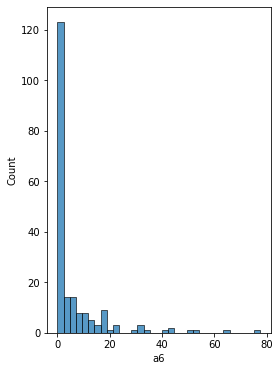

In [72]:
plt.figure(figsize=(4,6))
sns.histplot(x="a6", data=df);

As seen above, the most frequent value for a6 is 0.0

I then decided to check the max and min values of a1 and a3, two algaes with big difference in range

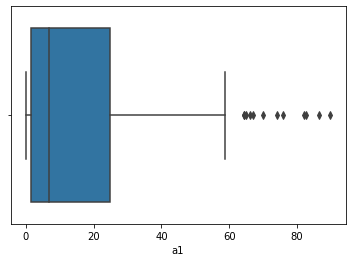

In [73]:
sns.boxplot(x="a1", data=df);

We can see from above that the maximum value for a1 is over 80 and the middle quartile is about 5 while the minimum value is 0

<AxesSubplot:xlabel='a3'>

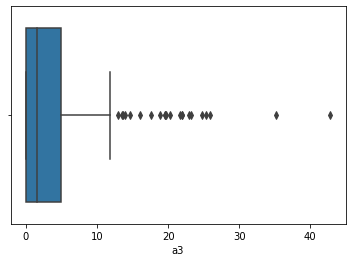

In [74]:
sns.boxplot(x="a3", data=df)

We can also see from above that the maximum value for a3 is over 40 and the middle quartile is about 1 while the min value is 0

I then decided to check the count of sizes in the dataset

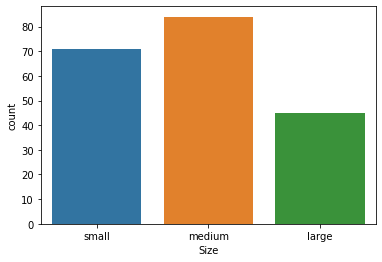

In [75]:
sns.countplot(x="Size", data=df);

As seen above, the most frequest size is medium and the least frequent is large

I also decided to check the most frequent speed in the dataset

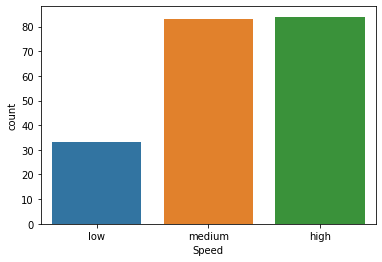

In [76]:
sns.countplot(x="Speed", data=df);

As seen above, the most frequest speed is high and the least frequent is low

I also decided to check the most frequent seasons in the dataset

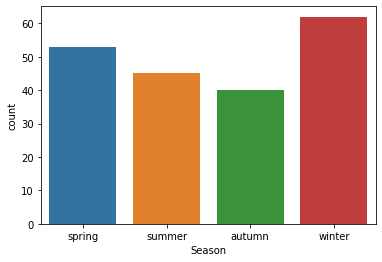

In [77]:
sns.countplot(x="Season", data=df);

As seen above, the most frequent season is winter and the least frequent is automn

I also decided to check the count of sizes based on season

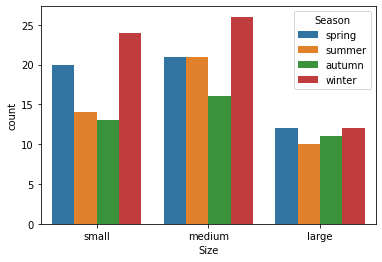

In [78]:
sns.countplot(x="Size", hue='Season', data=df);

From the diagram above, we can see that all sizes are more frequent in winter and less frequent in other seasons specially automn

I also decided to check the count of sizes based on speed

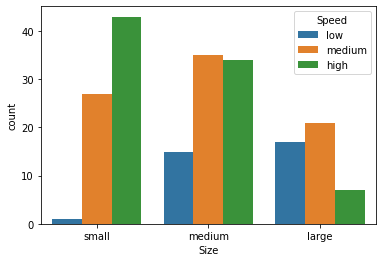

In [70]:
sns.countplot(x="Size", hue='Speed', data=df);

As seen above, the small size has high speed more freuently than the other sizes and the low speed less frequently than other sizes

However, the large size has the low speed more frequently than other sizes and the high speed less frequently than other sizes

I also decided to check the count of speeds based on season

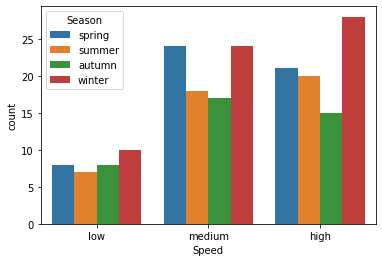

In [80]:
sns.countplot(x="Speed", hue='Season', data=df);

As seen above, the high speed has the hgihest count during winter and lowest during automn, medium speed has the highest count during winter and the lowest count during autum, low speed has the highest count during winter and lowest count during summer

I then decided to form boxplots to compare all the algaes

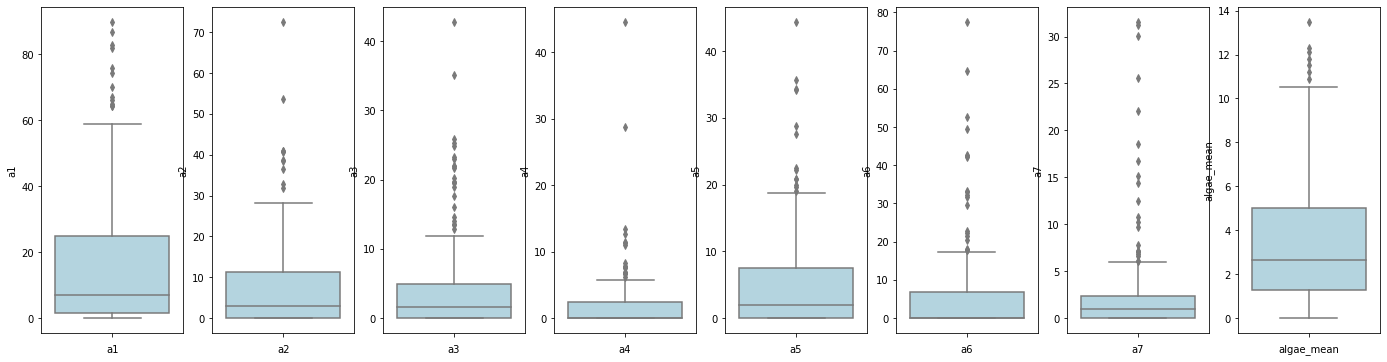

In [81]:
fig, axs = plt.subplots(1, 8, figsize=(24,6))
for k, c in enumerate(targets):
    sns.boxplot(data=df, y=c, color="lightblue", ax=axs[k])
    axs[k].set_xlabel(c)

As seen  above, the algae with the highest max value is a1 and the algae with the lowest max value is a7

We can see that a1, a2 and a6 have similar ranges

This is why we made algae_mean exclude those algaes

I then decided to check the difference between all the means of chemical elements, min_O2 and max_pH

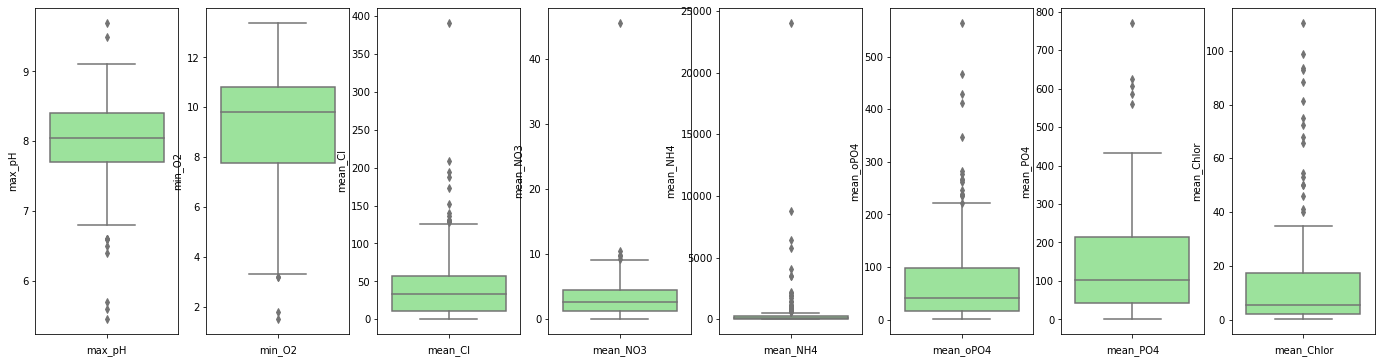

In [83]:
targets2 = ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor']
fig, axs = plt.subplots(1, 8, figsize=(24,6))
for k, c in enumerate(targets2):
    sns.boxplot(data=df, y=c, color="lightgreen", ax=axs[k])
    axs[k].set_xlabel(c)

As seen above, the highest mean max value for a chemical element is mean_NH4 and the lowest mean max value is mean_NO3

We can also see that min_O2 is higher than max_pH

I then decided to compare two algaes (a1 and a2) with big difference in ranges to check their min, max, mean, count and std based on season, speed and size

In [84]:
df.groupby("Season")["a1"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Season,,,,,
spring,0.0,89.8,16.649057,53,23.093786
summer,0.0,64.2,16.113333,45,17.723067
autumn,0.0,86.6,17.745000,40,21.611203
winter,0.0,81.9,17.216129,62,22.492558


We can see above that a1 has the biggest max in spring, mean in autumn, count in winter and std in spring

In [85]:
df.groupby("Season")["a3"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Season,,,,,
spring,0.0,42.8,6.926415,53,8.870330
summer,0.0,22.9,3.011111,45,4.844595
autumn,0.0,12.9,1.552500,40,2.453881
winter,0.0,35.1,4.793548,62,7.565818


We can see above that a3 has the biggest max in spring, mean in spring, count in winter and std in spring

In [92]:
df.groupby("Size")["a1"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Size,,,,,
small,0.0,89.8,27.145070,71,24.734538
medium,0.0,86.6,11.267857,84,17.163124
large,0.0,56.8,11.353333,45,16.458178


We can also see above that a1 has the biggest max, mean, and std for the small size, and a1 has the biggest count for medium size

In [87]:
df.groupby("Size")["a3"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Size,,,,,
small,0.0,42.8,3.229577,71,6.639393
medium,0.0,35.1,5.536905,84,7.964375
large,0.0,19.7,3.722222,45,4.844814


We can also see above that a3 has the biggest max for the small size, the biggest mean, count and std for the medium size

In [88]:
df.groupby("Speed")["a1"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Speed,,,,,
low,0.0,58.7,9.209091,33,13.164758
medium,0.0,89.8,12.479518,83,20.946976
high,0.0,81.9,24.345238,84,22.209123


We can also see above that a1 has the biggest max for the medium speed, and has the biggest mean, count and std for the high speed

In [89]:
df.groupby("Speed")["a3"].agg(["min","max","mean","count","std"])

,min,max,mean,count,std
Speed,,,,,
low,0.0,25.9,3.081818,33,6.003564
medium,0.0,24.8,4.374699,83,5.973740
high,0.0,42.8,4.727381,84,8.113507


We can also see above that a3 has the biggest max, mean, count and std for high speed

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

I then decided to check the correlation between a1 and max_pH & a3 and max_pH

In [90]:
df[["max_pH", "a1"]].corr()

,max_pH,a1
max_pH,1.000000,-0.271952
a1,-0.271952,1.000000


As we can see from above, there is a weak negative relationship between a1 and max_pH

In [91]:
df[["max_pH", "a3"]].corr()

,max_pH,a3
max_pH,1.000000,0.048964
a3,0.048964,1.000000


However, we can see from above that the relationship between a3 and max_pH is positive and weaker

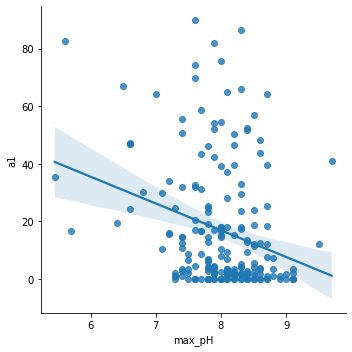

In [93]:
sns.lmplot(x="max_pH", y="a1", data=df)

We can see from the graph above that the linear relationship between a1 and max_pH is weak

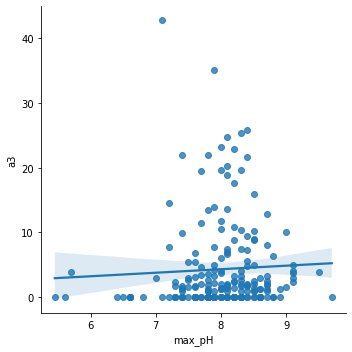

In [94]:
sns.lmplot(x="max_pH", y="a3", data=df)

Then we can see from the graph above that the linear relationship between a3 and max_pH is weaker

I then decided to do some comparisons between a2 and a3, a2 is just like a1 in terms of range but I just wanted to break the routin of using the same algaes all the time

The first thing I decided to do is to see if there is a relation between the quantity of a2 and max_pH based on size

I.e I wanted to see if a2 algae with different sizes grow more or less when max-pH value is high or low

<AxesSubplot:xlabel='a2', ylabel='max_pH'>

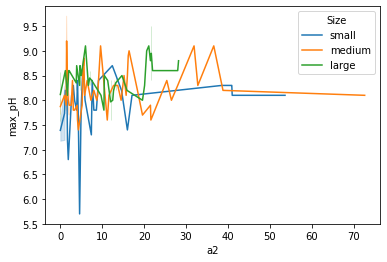

In [95]:
sns.lineplot(data=df, x="a2", y="max_pH", hue="Size")

###
# # LEFT HERE # #
###

As seen above, the relation is weak even when we use the Size as a hue

We can see that the a2 value goes high and low based on random max_pH values (i.e doesn't become high when max_pH value is high or vise versa)

We can predict from that diagram that the linear relation between a2 and max_pH is weak

I also decided to do is to see if there is a relation between the quantity of a3 and max_pH based on size

I.e I wanted to see if a3 algae with different sizes grow more or less when max-pH value is high or low

<AxesSubplot:xlabel='a3', ylabel='max_pH'>

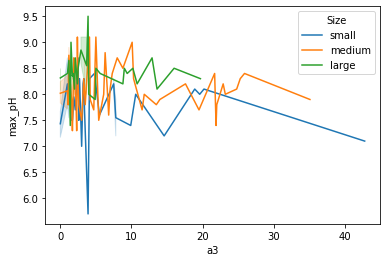

In [96]:
sns.lineplot(data=df, x="a3", y="max_pH", hue="Size")

As seen above, the relation is not constant even when we use the Size as a hue

We can see that the a3 value goes high and low based on random max_pH values (i.e doesn't become high when max_pH value is high or vise versa)

We can predict from that diagram that the linear relation between a3 and max_pH is weak

I also decided to do is to see if there is a relation between the quantity of a2 and max_pH based on Season

I.e I wanted to see if a2 algae grow more or less when max_pH value is high or low in different seasons

<AxesSubplot:xlabel='a2', ylabel='max_pH'>

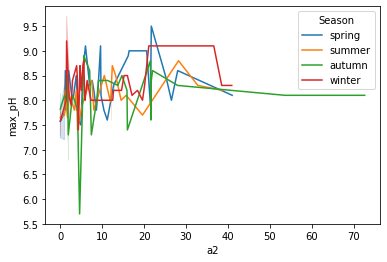

In [97]:
sns.lineplot(data=df, x="a2", y="max_pH", hue="Season")

As seen above, the relation is weak even when we use the Season as a hue

We can see that the a2 value goes high and low based on random max_pH values (i.e doesn't become high when max_pH value is high or vise versa)

We can predict from that diagram that the linear relation between a2 and max_pH is weak

I also decided to do is to see if there is a relation between the quantity of a3 and max_pH based on Season

I.e I wanted to see if a3 algae grow more or less when max_pH value is high or low in different seasons

<AxesSubplot:xlabel='a3', ylabel='max_pH'>

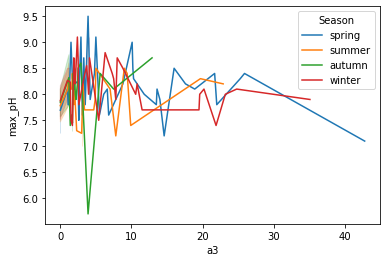

In [98]:
sns.lineplot(data=df, x="a3", y="max_pH", hue="Season")

As seen above, the relation is weak even when we use the Season as a hue

We can see that the a3 value goes high and low based on random max_pH values (i.e doesn't become high when max_pH value is high or vise versa)

We can predict from that diagram that the linear relation between a3 and max_pH is weak

I also decided to do is to see if there is a relation between the quantity of a3 and a2 based on Season

I.e I wanted to see if a3 algae affect the growth of a2 algaes or vise versa

<AxesSubplot:xlabel='a3', ylabel='a2'>

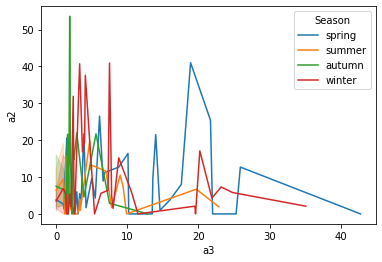

In [99]:
sns.lineplot(data=df, x="a3", y="a2", hue="Season")

As seen above, the relation is weak even when we use the Season as a hue

We can see that the a3 value goes high and low based on random a2 values (i.e doesn't become high when a2 value is high or vise versa)

We can predict from that diagram that the linear relation between a3 and a2 is weak

I decided to check the correlation between all the chemical elements numerical data and a1

In [100]:
columns = df.columns[:12]
corr = df[columns].corr()
corr

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
max_pH,1.000000,-0.192711,0.143893,-0.103081,-0.078806,0.171005,0.204793,0.382082,-0.271952
min_O2,-0.192711,1.000000,-0.277748,0.097608,-0.087357,-0.415023,-0.486300,-0.165835,0.285688
mean_Cl,0.143893,-0.277748,1.000000,0.225738,0.074519,0.392816,0.456717,0.151538,-0.359378
mean_NO3,-0.103081,0.097608,0.225738,1.000000,0.720892,0.145258,0.170239,0.144139,-0.240358
mean_NH4,-0.078806,-0.087357,0.074519,0.720892,1.000000,0.227778,0.209145,0.094478,-0.131724
mean_oPO4,0.171005,-0.415023,0.392816,0.145258,0.227778,1.000000,0.913250,0.130709,-0.415142
mean_PO4,0.204793,-0.486300,0.456717,0.170239,0.209145,0.913250,1.000000,0.269258,-0.484777
mean_Chlor,0.382082,-0.165835,0.151538,0.144139,0.094478,0.130709,0.269258,1.000000,-0.281788
a1,-0.271952,0.285688,-0.359378,-0.240358,-0.131724,-0.415142,-0.484777,-0.281788,1.000000


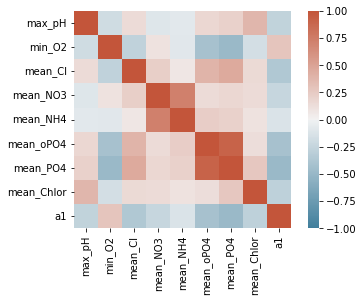

In [101]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap);

As we see above from the graph and from the data we gathered from the corr() function, the highest correlations are between mean_NH4 & mean_NO3 and between mean_PO4 and mean_oPO4 according to Pearson's Correlation method

In [102]:
columns = df.columns[:12]
corr = df[columns].corr(method='spearman')
corr

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
max_pH,1.000000,-0.162935,0.161202,-0.127379,0.041544,0.298271,0.236433,0.368160,-0.258709
min_O2,-0.162935,1.000000,-0.390592,0.052449,-0.344232,-0.454026,-0.511690,-0.206892,0.285648
mean_Cl,0.161202,-0.390592,1.000000,0.526493,0.561960,0.632776,0.675264,0.551578,-0.520420
mean_NO3,-0.127379,0.052449,0.526493,1.000000,0.423542,0.435166,0.446983,0.344830,-0.382004
mean_NH4,0.041544,-0.344232,0.561960,0.423542,1.000000,0.601507,0.641608,0.383673,-0.444859
mean_oPO4,0.298271,-0.454026,0.632776,0.435166,0.601507,1.000000,0.905944,0.483974,-0.666928
mean_PO4,0.236433,-0.511690,0.675264,0.446983,0.641608,0.905944,1.000000,0.521340,-0.653710
mean_Chlor,0.368160,-0.206892,0.551578,0.344830,0.383673,0.483974,0.521340,1.000000,-0.516479
a1,-0.258709,0.285648,-0.520420,-0.382004,-0.444859,-0.666928,-0.653710,-0.516479,1.000000


<AxesSubplot:>

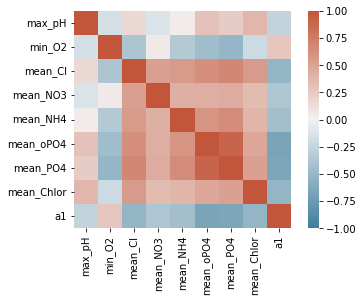

In [103]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

As we see above from the graph and from the data we gathered from the corr() function, the highest correlations are between  mean_PO4 and mean_oPO4 according to Spearman's Correlation method

In [104]:
import phik
columns = df.columns[:12]
corr = df[columns].phik_matrix()
corr

interval columns not set, guessing: ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor', 'a1']


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
Season,1.000000,0.000000,0.000000,0.000000,0.347355,0.000000,0.000000,0.035445,0.000000,0.103975,0.006213,0.000000
Size,0.000000,1.000000,0.616769,0.638396,0.280810,0.298343,0.176753,0.000000,0.024812,0.529979,0.215159,0.359570
Speed,0.000000,0.616769,1.000000,0.472123,0.440935,0.324519,0.000000,0.096438,0.472838,0.586418,0.488874,0.372220
max_pH,0.000000,0.638396,0.472123,1.000000,0.215759,0.000000,0.000000,0.000000,0.000000,0.000000,0.403383,0.357661
min_O2,0.347355,0.280810,0.440935,0.215759,1.000000,0.356251,0.000000,0.416948,0.492077,0.537981,0.341269,0.000000
mean_Cl,0.000000,0.298343,0.324519,0.000000,0.356251,1.000000,0.259715,0.100585,0.452819,0.481434,0.250904,0.000000
mean_NO3,0.000000,0.176753,0.000000,0.000000,0.000000,0.259715,1.000000,0.642731,0.149131,0.247558,0.373277,0.000000
mean_NH4,0.035445,0.000000,0.096438,0.000000,0.416948,0.100585,0.642731,1.000000,0.734890,0.776470,0.207252,0.000000
mean_oPO4,0.000000,0.024812,0.472838,0.000000,0.492077,0.452819,0.149131,0.734890,1.000000,0.954542,0.000000,0.000000
mean_PO4,0.103975,0.529979,0.586418,0.000000,0.537981,0.481434,0.247558,0.776470,0.954542,1.000000,0.245646,0.220371


<AxesSubplot:>

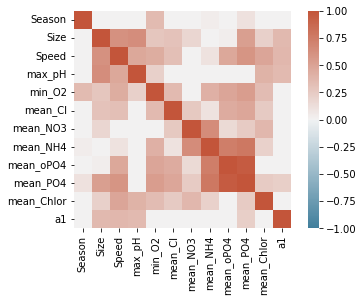

In [105]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

As we see above from the graph and from the data we gathered from the corr() function, the highest correlations are between mean_oPO4 and mean_PO4 according to Phik Correlation method

I decided to see with what size does a2 and a3 get the highest values

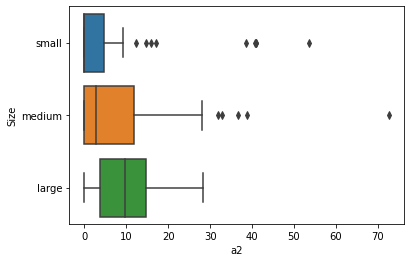

In [106]:
sns.boxplot(x="a2", y="Size", data=df);

We can see from above that a2 that has the medium size have the highest numeric value compared to other sizes

The lowest middle quartile is for the small size

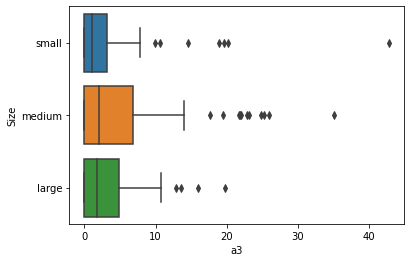

In [107]:
sns.boxplot(x="a3", y="Size", data=df);

If we do the same comparison on a3, we will find that the highest value comes with the small size and the highest middle quartile comes with the medium size

I decided to see with what speed does a2 and a3 get the highest values

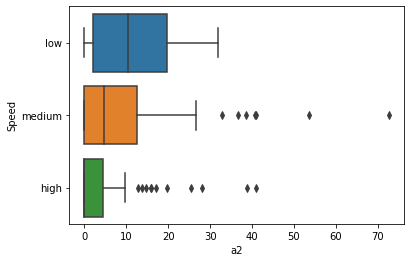

In [108]:
sns.boxplot(x="a2", y="Speed", data=df);

We can see from above that a2 that has the medium speed have the highest numeric value compared to other sizes

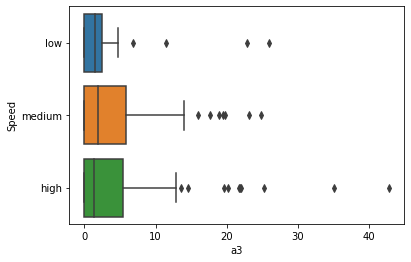

In [109]:
sns.boxplot(x="a3", y="Speed", data=df);

For a3 however, the highest value comes with high speed but the lowest middle quartile comes with high speed

I then decided to see with what season does a2 and a3 get the highest values

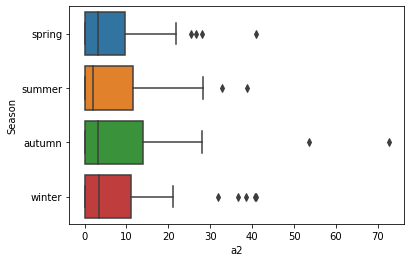

In [110]:
sns.boxplot(x="a2", y="Season", data=df);

As we can see above, the highest a2 value comes with the automn season

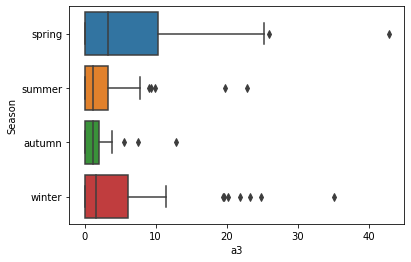

In [111]:
sns.boxplot(x="a3", y="Season", data=df);

However for a3, the highest value comes with the spring season

I then decided to check on what size does a2 get its highest numerical value using speed as a hue

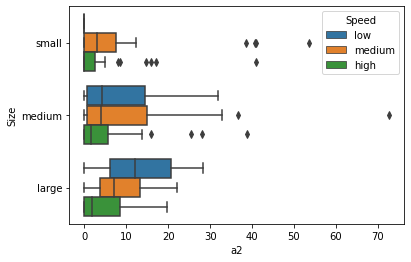

In [112]:
sns.boxplot(x="a2", y="Size", hue="Speed", data=df);

As seen above, I found out that the highest a2 value achieved was for an a2 with medium size and medium speed

I then decided to check on what size does a2 get its highest numerical value using season as a hue

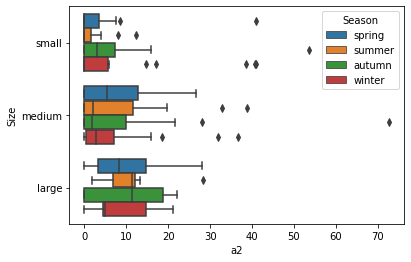

In [113]:
sns.boxplot(x="a2", y="Size", hue="Season", data=df);

As seen above, I found out that the highest a2 value achieved was for an a2 with medium size during autumn season

I then decided to check on what speed does a2 get its highest numerical value using season as a hue

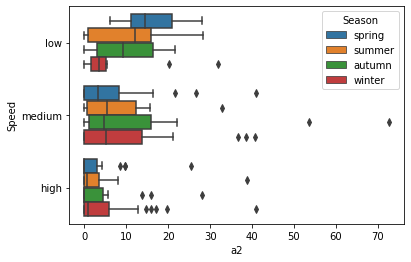

In [114]:
sns.boxplot(x="a2", y="Speed", hue="Season", data=df);

As seen above, I found out that the highest a2 value achieved was for an a2 with medium speed during autumn season

I then decided to check on what size does a3 get its highest numerical value using speed as a hue

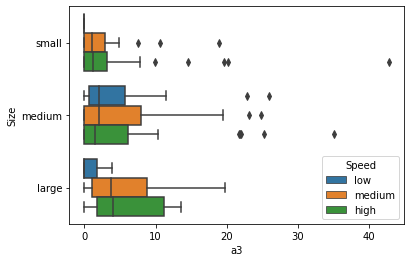

In [115]:
sns.boxplot(x="a3", y="Size", hue="Speed", data=df);

As seen above, I found out that the highest a3 value achieved was for an a3 with small size and high speed

I then decided to check on what size does a3 get its highest numerical value using season as a hue

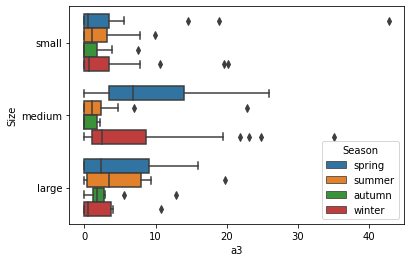

In [116]:
sns.boxplot(x="a3", y="Size", hue="Season", data=df);

As seen above, I found out that the highest a3 value achieved was for an a3 with small size during spring season

I then decided to check on what speed does a3 get its highest numerical value using season as a hue

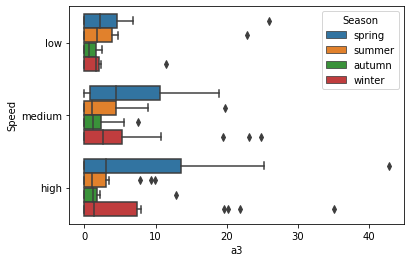

In [117]:
sns.boxplot(x="a3", y="Speed", hue="Season", data=df);

As seen above, I found out that the highest a3 value achieved was for an a3 with high speed during spring season

Also the highest middle quartile achieved was for the medium speed during the spring season

##End of Answer 3##

# Summery:

From the analysis we did above, we discovered that the correlation between a1 and almost all the chemical components is weak, we saw that in the heatmap

We then decided to check and see if this is the case for another algae that has a similar range to a1 (a2) and we tested its relation with max_pH using  Size and Speed as hues and using lineplots as a choice for a graph to see if the values of the two columns go up or down with each other, We were still unable to find a strong relation between the two columns

We also tested a3 the same way we tested a2 to see if an algae with different range will have any correlations that a1 or a2 don't have with max_pH, but we found out that a3 relation with max_pH is also weak based on Season and Size

We then tried to see if there is any relation between a2 and a3 (i.e. do they affect each other growth postively or negatively) and we used lineplot as a graph of choice, but we couldn't find a strong relation in this area either

It is difficult for us to conclude that all algaes present in our dataset will have similar relations with max_pH, each other or even other chemical elements, but the analysis we made might help us to gain an initial insight and expect some relations before we test them

##End of EDA 2##